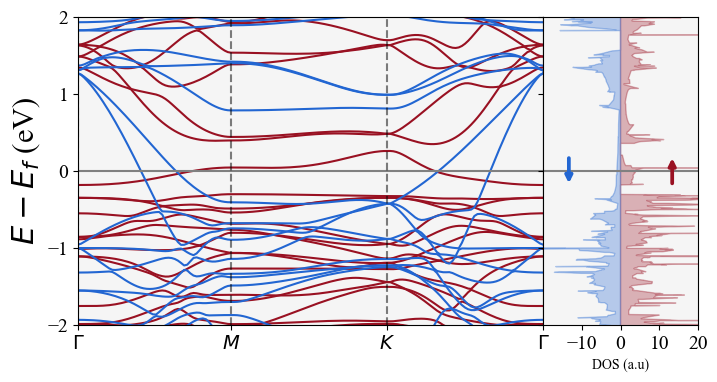

In [7]:
import matplotlib.pyplot as plt
from pymatgen.io.vasp.outputs import Vasprun, BSVasprun
from pymatgen.electronic_structure.core import Spin
import numpy as np
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['axes.facecolor'] = 'whitesmoke'
#Load the KPOINTS File into memory
f=open('CDW/bands/KPOINTS')
#Create a list containing each line as an element
Kpoints_lines=f.readlines()
#Initialize an empty list to store the k vectors
Kvectors = []
#iterate through the lines in the KPOINTS line by line
for line in Kpoints_lines:
    #Split the line by empty space
    content = line.split()
    #Check if the line after splitting has more than 3 elements
    if (len(content) > 3):
        '''Try to explicity interperet the values into float data type and except a value error in case the element
        cannot be interepreted as type float'''
        try:
            float(content[0])
            float(content[1])
            float(content[2])
            #If the list is empty, append the item
            if (not Kvectors):
                Kvectors.append(content[0:3])
            #If the list is not empty, make sure you are he added new kpoint is different from most recent one
            if ((Kvectors) and (content[0:3]) != Kvectors[-1]):
                Kvectors.append(content[0:3])
            '''Dummy except. In case a ValueError is raised when trying to explicitly interpret a value 
            that is a float'''
        except ValueError:
            pass
#Turn the list into a numpy array
Kvectors = np.array(Kvectors).astype(float)

Kpoints = []
f=open("CDW/bands/EIGENVAL")
Eigen_lines = f.readlines()
Remove_excess = True
spin_up_occ = []
spin_down_occ = []

for i in range (len(Eigen_lines)):
    if (not Eigen_lines[i].split()):
        spin_up = Eigen_lines[i+1].split()[3]
        spin_up_occ.append(spin_up)
        point = np.array(Eigen_lines[i+1].split()[0:3]).astype(float)
        Kpoints.append(point)
        
j = 0
band_loc = []
for i in range(len(Kpoints)):
    first = np.around(Kpoints[i],decimals=4)
    second = np.around(Kvectors[j],decimals=4)
    if (np.logical_and((first==second).all(), (first==second).all())):
        j = j+1
        band_loc.append(i)
        
# Load the band structure vasprun.xml file
vasprun_bs = BSVasprun("CDW/bands/vasprun.xml", parse_projected_eigen=True)
band_structure = vasprun_bs.get_band_structure()
bands = band_structure.bands
bands_up = bands[Spin.up]
bands_down = bands[Spin.down]

# Load the DOS vasprun.xml file
vasprun_dos = Vasprun("CDW/DOS/vasprun.xml")
dos = vasprun_dos.complete_dos
energies = dos.energies - dos.efermi  # Shift energies by Fermi level
dos_up = dos.densities[Spin.up]
dos_down = dos.densities[Spin.down]

# Create a figure with two subplots, sharing the y-axis
# Adjust the subplot sizes using gridspec_kw
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharey=True, gridspec_kw={'width_ratios': [3, 1]})

spin_up_color = '#991122'
spin_down_color = '#2266D2'
# Plot the band structure
for band in bands_up:
    ax1.plot(band - dos.efermi, color=spin_up_color)  # Adjust for Fermi level
for band in bands_down:
    ax1.plot(band - dos.efermi, color=spin_down_color)

ax1.set_ylabel(r"$E-E_f$ (eV)",fontsize=22)
ax1.axhline(0, color='gray')  # Fermi level line
ax1.margins(x=0)

# Add your vertical lines for high symmetry points here
# ax1.axvline(x_position, color='k', linestyle='--')

# Plot the DOS
ax2.plot(dos_up, energies, color=spin_up_color, linewidth='0.05' )
ax2.plot(-dos_down, energies, color=spin_down_color, linewidth='0.05')  # Invert for spin down
ax2.fill_betweenx(energies, dos_up, 0, color=spin_up_color, alpha=0.3)
ax2.fill_betweenx(energies, -dos_down, 0, color=spin_down_color, alpha=0.3)
ax2.margins(x=0)

ax2.set_xlabel("DOS (a.u)")
ax2.axhline(0, color='gray')  # Fermi level line
ax2.set_xticks([-10,0,10,20])
#ax2.xlabel('DOS (a.u)', fontsize = 22)
# Set limits for axes
ax1.set_ylim([-2, 2])
ax2.annotate("", xy=(13.333, 0.2), xytext=(13.333, -0.2),
            arrowprops=dict(arrowstyle="-|>",color=spin_up_color, lw=2.7))
ax2.annotate("", xy=(-13.333, -0.2), xytext=(-13.333, 0.2),
            arrowprops=dict(arrowstyle="-|>",color=spin_down_color, lw=2.7))
# Update the following line with your ticks_loc and labels
ax1.set_xticks(band_loc, [r'$\Gamma$', r'$M$', r'$K$', r'$\Gamma$'], fontsize=18)
ax2.set_xlim([-20, 20])
ax1.tick_params(axis='both', which='major', labelsize=14)  # Adjust the font size as needed
ax2.tick_params(axis='both', which='major', labelsize=14)  # Adjust the font size as needed

for xc in band_loc[:-1]:
    ax1.axvline(x=xc, color='k', linestyle='--', alpha = 0.5)
# Adjust layout to reduce space between subplots
plt.subplots_adjust(wspace=0)
plt.savefig('CDW-bands.png', dpi = 400)
plt.show()


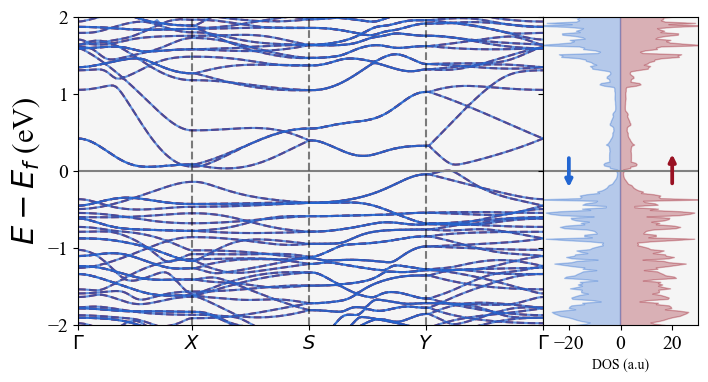

In [9]:
import matplotlib.pyplot as plt
from pymatgen.io.vasp.outputs import Vasprun, BSVasprun
from pymatgen.electronic_structure.core import Spin
import numpy as np
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['axes.facecolor'] = 'whitesmoke'
#Load the KPOINTS File into memory
f=open('SDW/bands/KPOINTS') 
#Create a list containing each line as an element
Kpoints_lines=f.readlines()
#Initialize an empty list to store the k vectors
Kvectors = []
#iterate through the lines in the KPOINTS line by line
for line in Kpoints_lines:
    #Split the line by empty space
    content = line.split()
    #Check if the line after splitting has more than 3 elements
    if (len(content) > 3):
        '''Try to explicity interperet the values into float data type and except a value error in case the element
        cannot be interepreted as type float'''
        try:
            float(content[0])
            float(content[1])
            float(content[2])
            #If the list is empty, append the item
            if (not Kvectors):
                Kvectors.append(content[0:3])
            #If the list is not empty, make sure you are he added new kpoint is different from most recent one
            if ((Kvectors) and (content[0:3]) != Kvectors[-1]):
                Kvectors.append(content[0:3])
            '''Dummy except. In case a ValueError is raised when trying to explicitly interpret a value 
            that is a float'''
        except ValueError:
            pass
#Turn the list into a numpy array
Kvectors = np.array(Kvectors).astype(float)

Kpoints = []
f=open("SDW/bands/EIGENVAL")
Eigen_lines = f.readlines()
Remove_excess = True
spin_up_occ = []
spin_down_occ = []

for i in range (len(Eigen_lines)):
    if (not Eigen_lines[i].split()):
        spin_up = Eigen_lines[i+1].split()[3]
        spin_up_occ.append(spin_up)
        point = np.array(Eigen_lines[i+1].split()[0:3]).astype(float)
        Kpoints.append(point)
        
j = 0
band_loc = []
for i in range(len(Kpoints)):
    first = np.around(Kpoints[i],decimals=4)
    second = np.around(Kvectors[j],decimals=4)
    if (np.logical_and((first==second).all(), (first==second).all())):
        j = j+1
        band_loc.append(i)
        
# Load the band structure vasprun.xml file
vasprun_bs = BSVasprun("SDW/bands/vasprun.xml", parse_projected_eigen=True)
band_structure = vasprun_bs.get_band_structure()
bands = band_structure.bands
bands_up = bands[Spin.up]
bands_down = bands[Spin.down]

# Load the DOS vasprun.xml file
vasprun_dos = Vasprun("SDW/DOS/vasprun.xml")
dos = vasprun_dos.complete_dos
energies = dos.energies - dos.efermi  # Shift energies by Fermi level
dos_up = dos.densities[Spin.up]
dos_down = dos.densities[Spin.down]

# Create a figure with two subplots, sharing the y-axis
# Adjust the subplot sizes using gridspec_kw
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharey=True, gridspec_kw={'width_ratios': [3, 1]})

spin_up_color = '#991122'
spin_down_color = '#2266D2'
# Plot the band structure
for band in bands_up:
    ax1.plot(band - dos.efermi, color=spin_up_color, linestyle = 'dashed')  # Adjust for Fermi level
for band in bands_down:
    ax1.plot(band - dos.efermi, color=spin_down_color,alpha = 0.7)

ax1.set_ylabel(r"$E-E_f$ (eV)",fontsize=22)
ax1.axhline(0, color='gray')  # Fermi level line
ax1.margins(x=0)

# Add your vertical lines for high symmetry points here
# ax1.axvline(x_position, color='k', linestyle='--')

# Plot the DOS
ax2.plot(dos_up, energies, color=spin_up_color,linewidth='0.05')
ax2.plot(-dos_down, energies, color=spin_down_color,linewidth='0.05',linestyle = 'dashed')  # Invert for spin down
ax2.fill_betweenx(energies, dos_up, 0, color=spin_up_color, alpha=0.3)
ax2.fill_betweenx(energies, -dos_down, 0, color=spin_down_color, alpha=0.3)
ax2.margins(x=0)

ax2.set_xlabel("DOS (a.u)")
ax2.axhline(0, color='gray')  # Fermi level line
ax2.set_xticks([-20,0,20,40])
#ax2.xlabel('DOS (a.u)', fontsize = 22)
# Set limits for axes
ax1.set_ylim([-2, 2])
ax2.annotate("", xy=(20, 0.25), xytext=(20, -0.2),
            arrowprops=dict(arrowstyle="-|>",color=spin_up_color, lw=2.7))
ax2.annotate("", xy=(-20, -0.25), xytext=(-20, 0.2),
            arrowprops=dict(arrowstyle="-|>",color=spin_down_color, lw=2.7))
# Update the following line with your ticks_loc and labels
ax1.set_xticks(band_loc, [r'$\Gamma$', r'$X$', r'$S$', r'$Y$', r'$\Gamma$'], fontsize=18)
ax2.set_xlim([-30, 30])
ax1.tick_params(axis='both', which='major', labelsize=14)  # Adjust the font size as needed
ax2.tick_params(axis='both', which='major', labelsize=14)  # Adjust the font size as needed

for xc in band_loc[:-1]:
    ax1.axvline(x=xc, color='k', linestyle='--', alpha = 0.5)
# Adjust layout to reduce space between subplots
plt.subplots_adjust(wspace=0)
plt.savefig('SDW-bands.png', dpi = 400)
plt.show()
